In [1]:
import numpy as np
from sensor_msgs.msg import PointCloud2
import rosbag
import matplotlib.pyplot as plt
bag = rosbag.Bag('dataset/demo_rio_format.bag')
import rospy

In [2]:
from radar_ego_velocity.radar_ego_velocity_estimator import RadarEgoVelocityEstimator
estimator = RadarEgoVelocityEstimator()

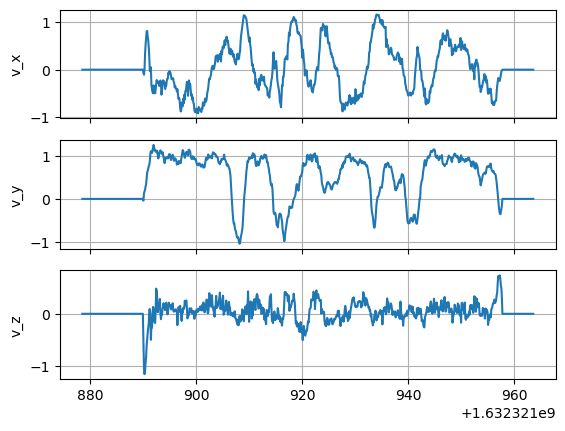

In [3]:
vx = []
vy = []
vz = []
ts = []

for topic, msg, timestamp in bag.read_messages(topics=['/sensor_platform/radar/scan']):
    # print(f"Timestamp: {timestamp}, msg {msg}")
    t = timestamp.to_sec()
    v = np.zeros(3)
    P = np.eye(3)
    flag, inlier = estimator.estimate0(msg, v, P)
    if flag:
        vx.append(v[0]); vy.append(v[1]); vz.append(v[2]); ts.append(t)

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# Plot on the first subplot
ax1.plot(ts, vx)

# Plot on the second subplot
ax2.plot(ts, vy)

# Plot on the third subplot
ax3.plot(ts, vz)

# Add grids to all subplots
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
# add titles
ax1.set_ylabel('v_x')
ax2.set_ylabel('v_y')
ax3.set_ylabel('v_z')
# Show the figure
plt.show()

In [11]:
flag = True
for topic, msg, timestamp in bag.read_messages(topics=['/sensor_platform/radar/scan', '/sensor_platform/radar/trigger']):
    if topic == '/sensor_platform/radar/scan':
        if flag:
            print('AAAA')
        flag = True
    elif topic == '/sensor_platform/radar/trigger':
        if not flag:
            print('AAAA')
        flag = False

In [7]:
yy = np.array(vy)
tt = np.array(ts)
tt[np.where(yy == 0)] - 1.632321e9

array([878.56874847, 878.66895223, 878.76718283, 878.86728454,
       878.96911955, 879.0690763 , 879.16881061, 879.26952195,
       879.36899042, 879.46961164, 879.57740545, 879.66715479,
       879.76853085, 879.87024951, 879.96770287, 880.06924629,
       880.16907883, 880.26953053, 880.36879611, 880.46903825,
       880.56889319, 880.66963124, 880.76850915, 880.86941552,
       880.96880198, 881.06907654, 881.16879153, 881.26947641,
       881.36994243, 881.46917653, 881.57015395, 881.66984868,
       881.7695148 , 881.86952424, 881.96959615, 882.07003045,
       882.17106819, 882.26976681, 882.37052941, 882.47000599,
       882.56989336, 882.6706593 , 882.77023983, 882.87036729,
       882.97750258, 883.0702672 , 883.17033124, 883.27042389,
       883.37130427, 883.47601271, 883.57212329, 883.6718297 ,
       883.77141523, 883.87206268, 883.97203064, 884.07133436,
       884.17128086, 884.27190232, 884.37175632, 884.47180939,
       884.57232809, 884.67173123, 884.77274203, 884.87